In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn import datasets
import os

In [127]:
# Get data
data_dir = "/Users/dj/Documents/GitHub/project-neurocloud/data/golf_df.csv"

In [182]:
dat = pd.read_csv(data_dir)

In [183]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [185]:
for col in dat.columns:
    dat[col] = dat[col].astype('category')

targets = [{'no': 0, 'yes': 1}.get(i, 'none') for i in list(dat['Play'])]
dat["Play"] = targets

dat["Play"]  = dat["Play"].astype('int64')

In [186]:
from sklearn.tree import DecisionTreeClassifier
X = dat.iloc[:, 0:-1] # petal length and width y = iris.target
y = dat.loc[:, "Play"]
tree_clf = DecisionTreeClassifier(max_depth=4)

one_hot_data = pd.get_dummies(dat[['Outlook', 'Temperature', 'Humidity', 'Windy']],drop_first=True)
tree_clf.fit(one_hot_data, dat['Play'])

DecisionTreeClassifier(max_depth=4)

In [137]:
# targets = [{'no': 0, 'yes': 1}.get(i, 'none') for i in list(dat['Play'])]
# dat["Play"] = targets

In [188]:
dat["Play"]  = dat["Play"].astype('string')

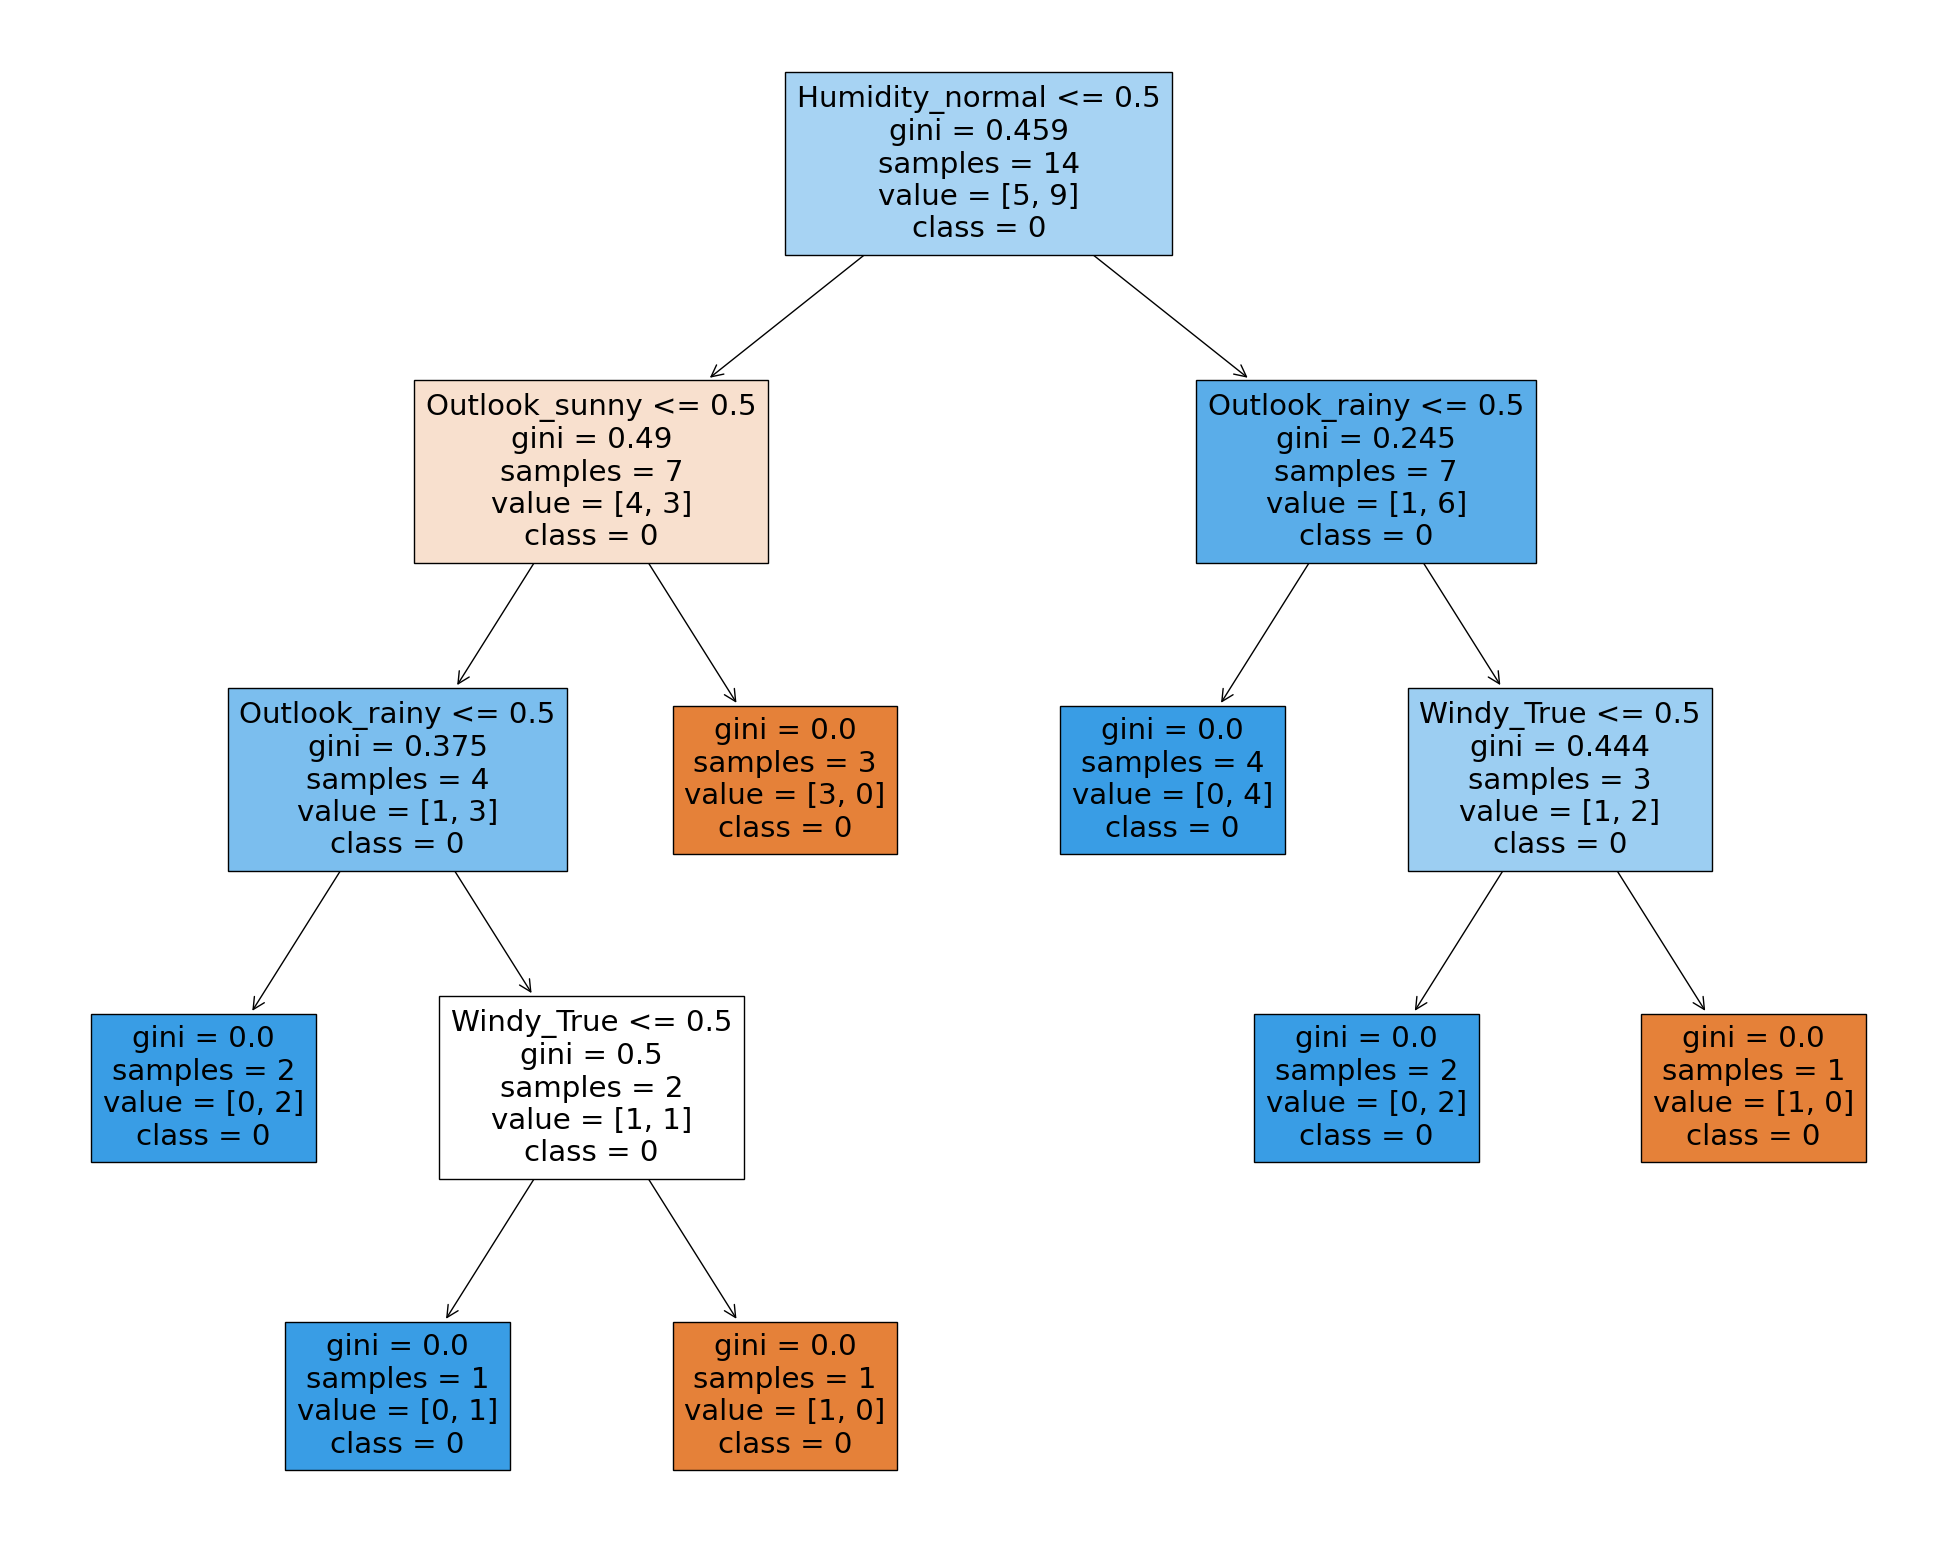

In [189]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=list(one_hot_data.columns),  
                   class_names=np.array(dat['Play']),
                   filled=True)

# Another attempt with wine data 

In [210]:
from sklearn.datasets import load_wine
data = load_wine(as_frame=True)

X = data.frame.loc[:, ['alcohol', 'color_intensity']]
y = data.frame.iloc[:, -1:]

In [211]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

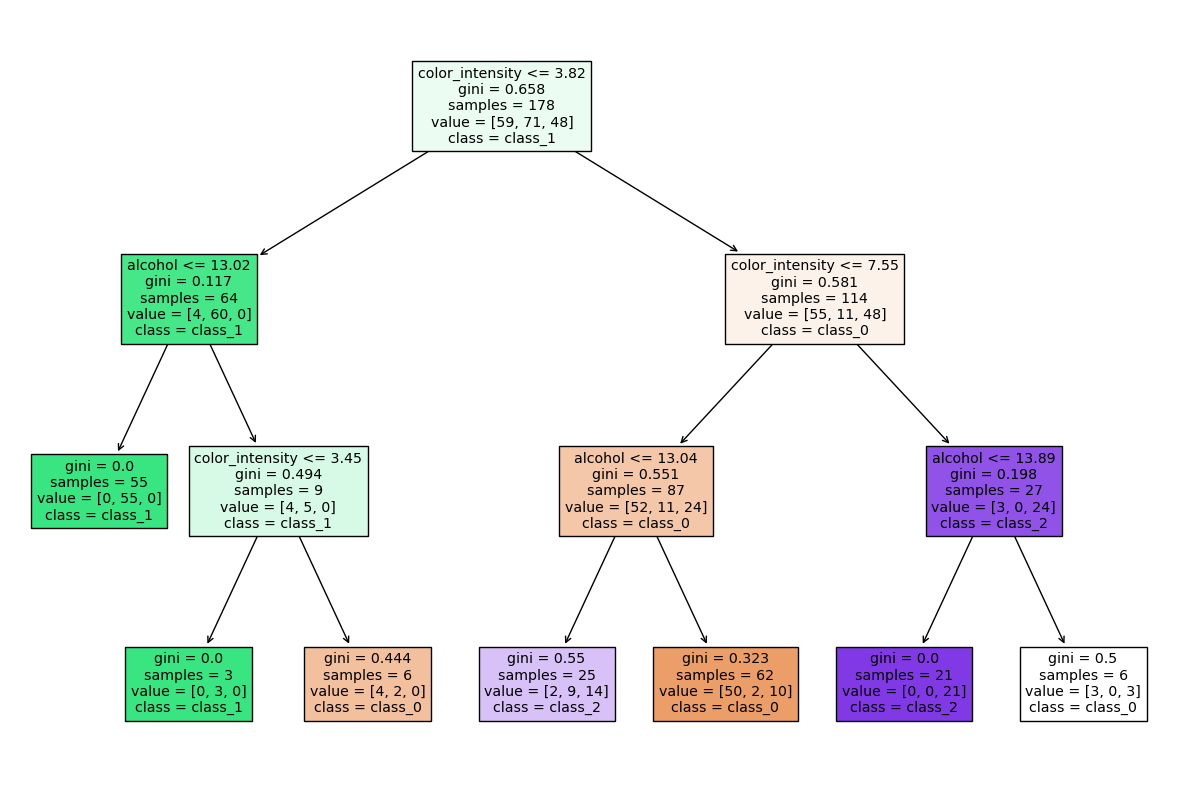

In [212]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(tree_clf, 
                   feature_names=['alcohol', 'color_intensity'],  # wine.feature_names
                   class_names=['class_0', 'class_1', 'class_2'], # wine.target_names
                   filled=True)

In [172]:
data.frame.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [208]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')